# Twitter Web Scraping and analysis 

The Brazilian parliament has organized a parliamentary commission of inquiry (CPI) to investigate the problems faced by the federal government in dealing with the COVID-19 pandemic.

With these notebooks we retrieved and analyzed data about the CPI on Twitter.

## Importação das bibliotecas necessárias

In [ ]:
# Bases necessárias
import pandas as pd
import numpy as np
import datetime
import time
import os

## Ler e Agregar
Ler todos os arquivos com os dados que raspamos do twitter e outras fontes.

Organizar esses dados em dataframes consolidados.

In [ ]:
df_raw = pd.DataFrame({})

# Bases extraídas do dia 05/04 até 15/04
cpi_da_pandemia = pd.read_csv('/content/drive/MyDrive/Colab_Datasets/CPI_COVID/brutos/20210405a27_cpi_da_pandemia.csv',sep = '\t', header = 0, low_memory=False)
cpi_da_covid = pd.read_csv('/content/drive/MyDrive/Colab_Datasets/CPI_COVID/brutos/20210405a27_cpi_da_covid.csv',sep = '\t', header = 0, low_memory=False)
hashtagcpidacovid = pd.read_csv('/content/drive/MyDrive/Colab_Datasets/CPI_COVID/brutos/hashtagcpidacovid.csv',sep = '\t', header = 0, low_memory=False)

FileNotFoundError: ignored

In [ ]:
# Cria um dataframe vazio pra agregar outros em cima
df_raw = pd.DataFrame({})


# Lista de dataframes das bases extraídas
dfs = [
    cpi_da_pandemia,
    cpi_da_covid,
    hashtagcpidacovid,
    #base_extraída_03
]

# Concatena as bases da lista, remove Tweets duplicados e reseta o index
df_raw = pd.concat(dfs)#.drop_duplicates(subset=['username', 'tweet', 'date'], keep='last', inplace = True).reset_index(drop=True)
df_raw.drop_duplicates(subset=['username', 'tweet', 'date'], keep='last', inplace = True)


# Organiza as linguagens
df_raw = df_raw[df_raw['language'] == 'pt']



### Cria dataframe menor e mais prático
dummy = df_raw.drop(['id', 'conversation_id', 'created_at', 'timezone',
       'user_id', 'place', 'language', 
       'urls', 'photos', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'], axis=1)

### Organiza o novo Dataframe
orgn= ['username', 'name', 'tweet', 'date', 'time', 'replies_count', 'retweets_count',
       'likes_count', 'hashtags', 'mentions']
dummy = dummy.reindex(columns=orgn)

# Tirar os posts do dia de hoje
# Primeiro acerta o valor que vai tirar
indexNames = dummy[ dummy['date'] == '%s'%datetime.date.today() ].index
# Deleta do dataFrame
dummy.drop(indexNames , inplace=True)
dummy.reset_index(drop=True, inplace=True)

In [ ]:
dummy.head()

NameError: ignored

In [ ]:
dummy.to_csv(r'/content/drive/MyDrive/Colab_Datasets/CPI_COVID/Ajustados/dados.csv', index = False)

In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/Colab_Datasets/CPI_COVID/Ajustados/dados.csv', encoding='utf-8', engine='python')

In [ ]:
# Retirar duplicatas

df.drop_duplicates(
    subset=['tweet', 'username', 'date', 'time'],
    inplace = True
)

# Apareceu um post em que o valor 'date' estava igual a '0'. Retiramos ele.
df.drop(df[df['date'] == '0'].index, inplace = True)
# Retiramos também os NAN
df.dropna(inplace=True)

## Posts por dia

In [ ]:
# Valores por dia
posts_por_dia = df['date'].value_counts()

# Organiza os valores 
posts_por_dia = posts_por_dia.sort_index()

# Total de posts depois de remover duplicatas
lista_de_datas = df['date'].sort_values().unique()
print("Foram publicados %d posts"%df.shape[0], "no período de %d dias"%len(posts_por_dia), "do dia %s"%lista_de_datas[0], 'ao dia %s.'%lista_de_datas[-1])

Foram publicados 127385 posts no período de 31 dias do dia 2021-04-05 ao dia 2021-05-05.


In [ ]:
posts_por_dia

2021-04-05       61
2021-04-06      174
2021-04-07      187
2021-04-08     2753
2021-04-09    11940
2021-04-10     5470
2021-04-11     3634
2021-04-12     7815
2021-04-13     5886
2021-04-14     6248
2021-04-15     3949
2021-04-16     4445
2021-04-17     2074
2021-04-18     1920
2021-04-19     3752
2021-04-20     3177
2021-04-21     1703
2021-04-22     1470
2021-04-23     1499
2021-04-24     1428
2021-04-25     1403
2021-04-26     3775
2021-04-27    13243
2021-04-28     6353
2021-04-29     6193
2021-04-30     3133
2021-05-01     1725
2021-05-02     1666
2021-05-03     2170
2021-05-04    14709
2021-05-05     3430
Name: date, dtype: int64

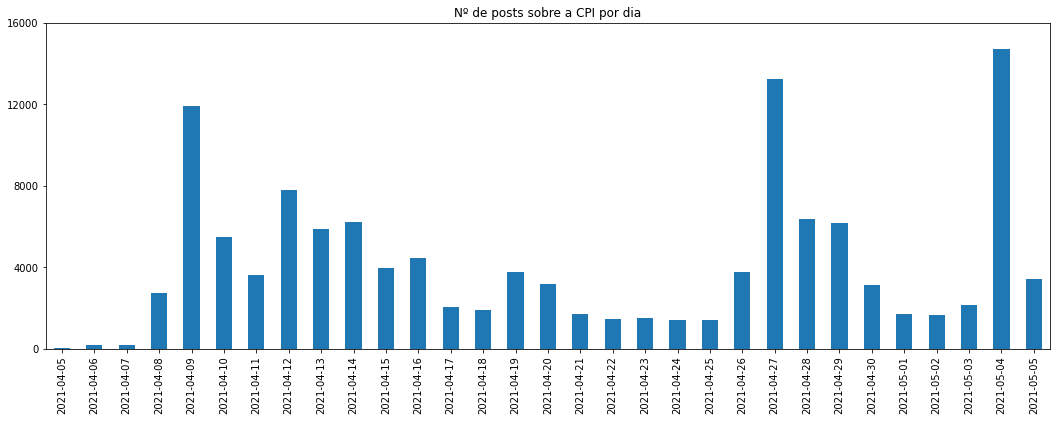

In [ ]:
dia = posts_por_dia.index
qtd = posts_por_dia.values

posts_por_dia.plot(
    title = "Nº de posts sobre a CPI por dia", 
    kind='bar', 
    yticks = list(range(0,20000,4000)),
    figsize=[18,6]
)

## Posts por perfil

In [ ]:
df_dummy = df
df_dummy['um']=1

posts_por_perfil = pd.pivot_table(
    df_dummy, 
    index = 'username', 
    values = 'um', 
    columns = 'date', 
    aggfunc= [np.sum]).fillna(0)

#Total sum per column: 
posts_por_perfil.loc[:,'Total']= posts_por_perfil.sum(axis=1)

# Ordena o novo dataframe
posts_por_perfil.sort_values('Total', ascending= False, inplace = True)

In [ ]:
posts_por_perfil.head()

sum                        ...                        Total
date          2021-04-05 2021-04-06 2021-04-07  ... 2021-05-04 2021-05-05       
username                                        ...                             
susan_blum           0.0        0.0        0.0  ...       27.0       40.0  598.0
o_antagonista        0.0        1.0        0.0  ...       50.0        6.0  428.0
marciodiaspt         0.0        0.0        0.0  ...        2.0        0.0  421.0
vonivar              0.0        0.0        0.0  ...       22.0        9.0  345.0
cnnbrasil            0.0        0.0        0.0  ...       21.0        8.0  328.0

[5 rows x 32 columns]

## RTs, mentions e likes

Quais os posts que geraram mais buzz?

In [ ]:
interacoes_minimas = 30

df_rts = df_raw[df_raw.retweets_count > interacoes_minimas]
df_rts.sort_values('retweets_count', ascending= False, inplace = True)
df_rts.drop(['id', 'conversation_id', 'created_at', 'timezone',
       'user_id', 'place', 'language', 'mentions','user_rt',
       'urls', 'photos', 'replies_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'retweet_id',
       'reply_to', 'translate', 'trans_src','retweet_date',
       'trans_dest', 'retweet', 'user_rt_id'], axis=1, inplace = True)


df_likes = df_raw[df_raw.likes_count > interacoes_minimas]
df_likes.sort_values('likes_count', ascending= False, inplace = True)
df_likes.drop(['id', 'conversation_id', 'created_at', 'timezone',
       'user_id', 'place', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'], axis=1, inplace = True)

df_replies = df_raw[df_raw.replies_count > interacoes_minimas]
df_replies.sort_values('replies_count', ascending= False, inplace = True)
df_replies.drop(['id', 'conversation_id', 'created_at', 'timezone',
       'user_id', 'place', 'language', 'mentions','reply_to',
       'urls', 'photos', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'], axis=1, inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib

### Análise dos RTs

Tópico | Feito
--- | ---
Quantos posts tem mais do que o mínimo? | [ x ]
Quais os perfis com mais RTs | [ x ]
Algum perfil costuma ter posts de destaque?| [ x ]
Tem algum termo que aparece mais nos RTs? | [ ]

In [ ]:
print("São %d posts com mais de"%df_rts.shape[0], "%d RTs."%interacoes_minimas)
print("")
display(df_rts.head(3))

São 3642 posts com mais de 30 RTs.



,date,time,username,name,tweet,retweets_count
179838,2021-04-09,02:08:39,gfiuza_oficial,Guilherme Fiuza,Barroso MANDA Senado abrir CPI da Covid. Pergu...,8956
163734,2021-04-12,12:05:57,carmelonetobr,Carmelo Neto,URGENTE! Acabei de falar com o senador Eduardo...,6720
140831,2021-04-18,02:47:23,carlosjordy,Carlos Jordy,Ventiladores encontrados em parede falsa em ho...,5093


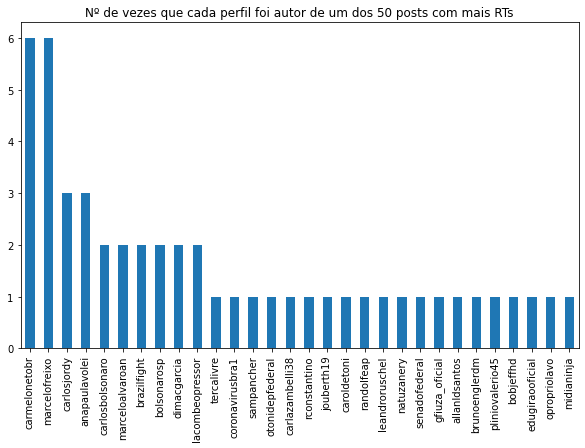

In [ ]:
# Nº de vezes que cada perfil foi autor de um dos 50 posts com mais RTs 

posts_por_perfil_top_RTs = df_rts['username'].head(50)
posts_por_perfil_top_RTs.value_counts().plot(
    title = "Nº de vezes que cada perfil foi autor de um dos 50 posts com mais RTs", 
    kind='bar', 
    yticks = list(range(7)),
    figsize=[10,6]
)

### Análise dos Likes **REVER TEXTO**

Tópico | Feito
--- | ---
Quantos posts tem mais do que o mínimo? | [x]
Quais os perfis com mais RTs | [x]
Algum perfil costuma ter posts de destaque?| [ ]
Tem algum termo que aparece mais nos RTs? | [ ]

In [ ]:
print("São %d posts com mais de"%df_likes.shape[0], "%d Likes."%interacoes_minimas)
print("")
display(df_likes.head(3))

São 11445 posts com mais de 30 Likes.



,date,time,username,name,tweet,likes_count
182985,2021-04-08,22:32:45,marcelofreixo,Marcelo Freixo,URGENTE! STF acaba de determinar a abertura im...,45534
163734,2021-04-12,12:05:57,carmelonetobr,Carmelo Neto,URGENTE! Acabei de falar com o senador Eduardo...,42417
176347,2021-04-09,15:56:55,felipeneto,Felipe Neto,Bolsonaro está com o cu na mão com a CPI da Co...,40782


### Análise dos Mentions **REVER TEXTO**

Tópico | Feito
--- | ---
Quantos posts tem mais do que o mínimo? | [x]
Quais os perfis com mais RTs | [x]
Algum perfil costuma ter posts de destaque?| [ ]
Tem algum termo que aparece mais nos RTs? | [ ]

In [ ]:
print("São %d posts com mais de"%df_replies.shape[0], "%d Replies."%interacoes_minimas)
print("")
display(df_replies.head(3))

São 2418 posts com mais de 30 Replies.



,date,time,username,name,tweet,replies_count
179930,2021-04-09,01:55:30,marcelvanhattem,Marcel van Hattem,Sou crítico a muitas decisões do STF que envol...,4671
157996,2021-04-13,13:23:03,revistaoeste,Revista Oeste,Doria critica inclusão de prefeitos e governad...,3996
65564,2021-04-08,22:50:35,stf_oficial,STF,Barroso determina instalação da CPI da Pandemi...,3634


## Análise das hashtags

In [ ]:
freq_hashtags = {}

# Pega todas as hashtags e coloca em uma lista de frequência
for h in df['hashtags']:
  h = str(h)
  q = h.split("'")

  for key in q:
    
    if key not in freq_hashtags:
      freq_hashtags[key] = 1
    else:
      freq_hashtags[key] += 1

# Remove algumas sujeiras do dict
keys_to_remove = ["[]", "[", "]", ", "]
for key in keys_to_remove:
  del freq_hashtags[key]

# Transforma dicionário em dataframe
df_freq_hashtags = pd.DataFrame.from_dict(freq_hashtags, orient='index')
df_freq_hashtags.sort_values(by = 0, inplace=True, ascending=False)

#print(freq_hashtags)
df_freq_hashtags.head(10)

,0
cpidacovid,17705
cpidapandemia,6804
cpidogenocidio,2436
forabolsonaro,2009
cpidapandemiaja,1772
bolsonarogenocida,1565
impeachmentdebolsonarourgente,1212
forabolsonarogenocida,965
covid19,924
bolsonaronacadeia,811


In [ ]:
# Importa bibliotecas pra fazer wordclou
import matplotlib.pyplot as plt
from wordcloud import WordCloud

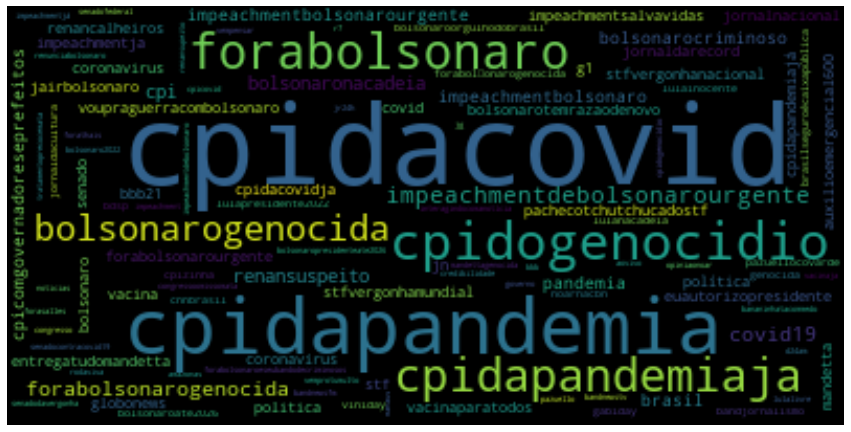

In [ ]:
# Gera wordcloud
wordcloud_hashtags = WordCloud().generate_from_frequencies(frequencies = freq_hashtags)

# Prepara o gráfico
plt.figure(figsize=[15,10])
plt.imshow(wordcloud_hashtags, interpolation='bilinear')
plt.axis("off")


plt.show()

## Perfis mais mencionados

In [ ]:
df.head(3)

,username,name,tweet,date,time,replies_count,retweets_count,likes_count,hashtags,mentions,um
0,andre_mintz,André Mintz,@blocodemocracia pq não abre uma CPI da pandem...,2021-04-29,20:08:49,0.0,0,0,[],[],1
1,mariaap51110487,maria❤️,É impressão minha ...ou o Brasil está sendo go...,2021-04-29,19:56:03,0.0,0,6,[],[],1
2,lobatadas,Heber Lobato Jr.,Uma CPI da Pandemia com real seriedade começar...,2021-04-29,19:46:20,0.0,1,1,[],[],1


In [ ]:
mencoes_ao_perfil = {}

for s in df['mentions']:
  if s == '[]':
    pass
  else:
    # encontra o screen_name
    start = s.find("{") + len("{")
    end = s.find("}")
    substring = s[start:end]
    s_name = substring.split("'")[3]

    # monta o dict de frequência das menções
    if s_name not in mencoes_ao_perfil:
      mencoes_ao_perfil[s_name] = 1
    else:
      mencoes_ao_perfil[s_name] += 1


# Transforma dicionário em dataframe
df_mencoes_ao_perfil = pd.DataFrame.from_dict(mencoes_ao_perfil, orient='index')
df_mencoes_ao_perfil.sort_values(by = 0, inplace=True, ascending=False)

In [ ]:
display(df_mencoes_ao_perfil.head(3))

print("")
print(df_mencoes_ao_perfil.shape)

,0
youtube,1919
jairbolsonaro,1553
senadofederal,1100



(1740, 1)


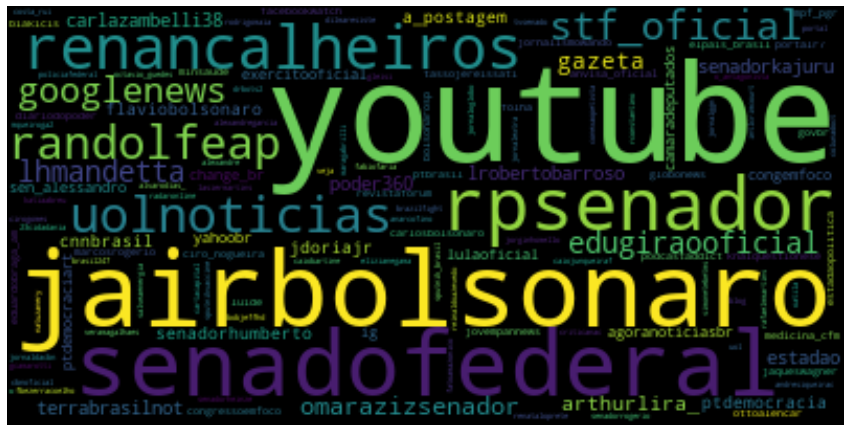

In [ ]:
# Gera wordcloud
wordcloud_mencoes = WordCloud().generate_from_frequencies(frequencies = mencoes_ao_perfil)

# Prepara o gráfico
plt.figure(figsize=[15,10])
plt.imshow(wordcloud_mencoes, interpolation='bilinear')
plt.axis("off")


plt.show()

## Os personagens

In [ ]:
senadores_cpi = {
    'Omar Aziz':"@", 
    "Renan Calheiros":"@", 
    "Randolfe Rodrigues":"@"
}

depoentes = {
    "Luiz Henrique Mandetta":"@", 
    "Nelson Teich":"@", 
    "Eduardo Pazuello":"@", 
    "Marcelo Queiroga":"@", 
    "Antonio Barra Torres":"@",
    "Fábio Wajngarten":"@"
}
